In [15]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Download the Dataset: Access and download the dataset provided below. This dataset includes 100 observations of two predictor variables $x_1$​ and $x_2$​, along with $y$ as the response variable.

Model Extension: Based on the model developed in 3-parameters_gradient_computation.ipynb, extend the model to incorporate three parameters (b, w1, w2) for a two-predictor-variable model.

Parameter Estimation with PyTorch:
Use PyTorch’s naive approach to estimate the parameters for the model $\hat{y} = b + w_1 x_1 + w_2 x_2$, where $\hat{y}$ is the predicted value of $y$.
Set the learning rate to 0.001 and the number of epochs to 1000.

Parameter Estimation with Linear Regression:
After using the PyTorch approach, estimate the parameters using a standard linear regression method.

Model Comparison:
Calculate the $R^2$ score for both methods (PyTorch and Linear Regression).
Compare the models and determine the best method based on the $R^2$ score.

Submit your full code including the following:
The estimated parameters from both methods. The $R^2$ scores for both models.
A brief explanation of which method performed better based on the score.

TWO-PREDICTOR LINEAR MODEL COMPARISON
Model: ŷ = b + w1*x1 + w2*x2


METHOD 1: PyTorch Gradient Descent

Training Configuration:
  Learning Rate: 0.001
  Number of Epochs: 1000
  Optimizer: SGD
  Loss Function: MSE
Epoch [200/1000], Loss: 6.622831
Epoch [400/1000], Loss: 3.247225
Epoch [600/1000], Loss: 1.594213
Epoch [800/1000], Loss: 0.783545
Epoch [1000/1000], Loss: 0.385481

PyTorch Estimated Parameters:
  b (intercept):  0.763847
  w1 (weight 1):  -1.702541
  w2 (weight 2):  2.464874

PyTorch R² Score: 0.967679

METHOD 2: Standard Linear Regression (sklearn)

Linear Regression Estimated Parameters:
  b (intercept):  1.002204
  w1 (weight 1):  -2.000154
  w2 (weight 2):  3.002307

Linear Regression R² Score: 0.999993

MODEL COMPARISON

----------------------------------------------------------------------
Parameter Comparison:
----------------------------------------------------------------------
Parameter       PyTorch         Linear Reg      Difference     
----------------------

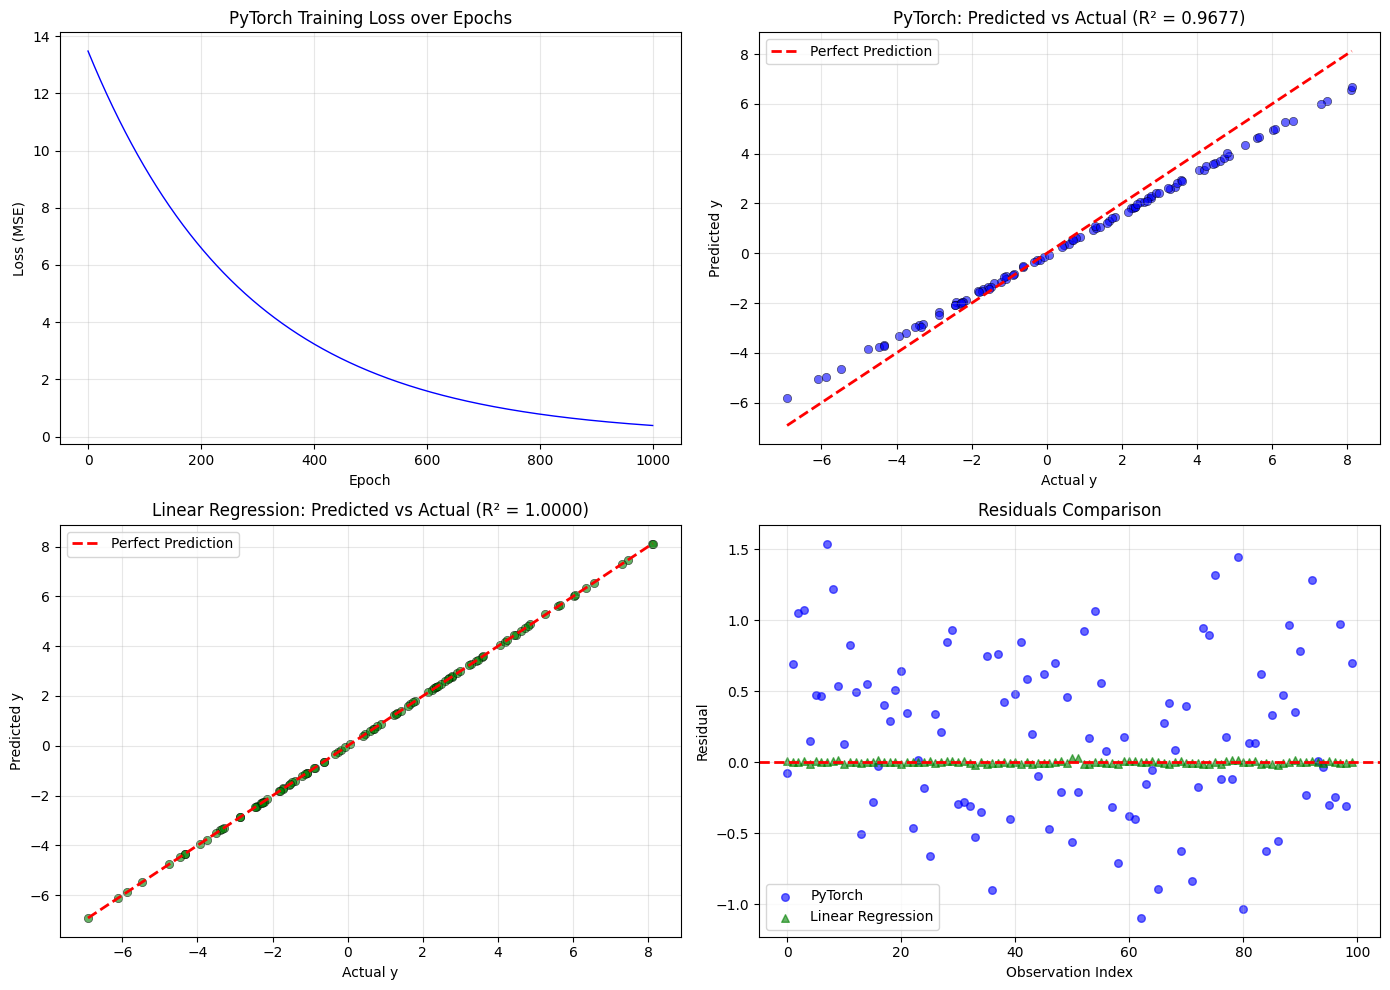

In [16]:
# Set random seed for reproducibility
torch.manual_seed(77)

# Load the dataset
df = pd.read_csv('../../datasets/data-1.csv')

print("="*70)
print("TWO-PREDICTOR LINEAR MODEL COMPARISON")
print("="*70)
print(f"Model: ŷ = b + w1*x1 + w2*x2\n")

# Extract features and target
x1 = df['x1'].values
x2 = df['x2'].values
y = df['y'].values

# Prepare data for PyTorch
X_torch = torch.FloatTensor(np.column_stack([x1, x2]))
y_torch = torch.FloatTensor(y).reshape(-1, 1)

# ============================================================================
# METHOD 1: PyTorch Gradient Descent
# ============================================================================
print("\n" + "="*70)
print("METHOD 1: PyTorch Gradient Descent")
print("="*70)

# Define the model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # The important difference with nn.Linear(1,1) and nn.Linear(2,1)
    
    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
model = LinearModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Training parameters
learning_rate = 0.001
n_epochs = 1000

print(f"\nTraining Configuration:")
print(f"  Learning Rate: {learning_rate}")
print(f"  Number of Epochs: {n_epochs}")
print(f"  Optimizer: SGD")
print(f"  Loss Function: MSE")

# Training loop
losses = []
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X_torch)
    loss = criterion(y_pred, y_torch)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    # Print progress every 200 epochs
    if (epoch + 1) % 200 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.6f}")

# Extract PyTorch parameters
pytorch_b = model.linear.bias.item()
pytorch_w1 = model.linear.weight[0, 0].item()
pytorch_w2 = model.linear.weight[0, 1].item()

# Make predictions with PyTorch model
with torch.no_grad():
    y_pred_pytorch = model(X_torch).numpy().flatten()

# Calculate R² score for PyTorch
r2_pytorch = r2_score(y, y_pred_pytorch)

print(f"\nPyTorch Estimated Parameters:")
print(f"  b (intercept):  {pytorch_b:.6f}")
print(f"  w1 (weight 1):  {pytorch_w1:.6f}")
print(f"  w2 (weight 2):  {pytorch_w2:.6f}")
print(f"\nPyTorch R² Score: {r2_pytorch:.6f}")

# ============================================================================
# METHOD 2: Standard Linear Regression
# ============================================================================
print("\n" + "="*70)
print("METHOD 2: Standard Linear Regression (sklearn)")
print("="*70)

# Prepare data for sklearn
X_lr = np.column_stack([x1, x2])

# Fit linear regression model
lr_model = LinearRegression()
lr_model.fit(X_lr, y)

# Extract Linear Regression parameters
lr_b = lr_model.intercept_
lr_w1 = lr_model.coef_[0]
lr_w2 = lr_model.coef_[1]

# Make predictions with Linear Regression
y_pred_lr = lr_model.predict(X_lr)

# Calculate R² score for Linear Regression
r2_lr = r2_score(y, y_pred_lr)

print(f"\nLinear Regression Estimated Parameters:")
print(f"  b (intercept):  {lr_b:.6f}")
print(f"  w1 (weight 1):  {lr_w1:.6f}")
print(f"  w2 (weight 2):  {lr_w2:.6f}")
print(f"\nLinear Regression R² Score: {r2_lr:.6f}")

# ============================================================================
# MODEL COMPARISON
# ============================================================================
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

print("\n" + "-"*70)
print("Parameter Comparison:")
print("-"*70)
print(f"{'Parameter':<15} {'PyTorch':<15} {'Linear Reg':<15} {'Difference':<15}")
print("-"*70)
print(f"{'b (intercept)':<15} {pytorch_b:<15.6f} {lr_b:<15.6f} {abs(pytorch_b - lr_b):<15.6f}")
print(f"{'w1 (weight 1)':<15} {pytorch_w1:<15.6f} {lr_w1:<15.6f} {abs(pytorch_w1 - lr_w1):<15.6f}")
print(f"{'w2 (weight 2)':<15} {pytorch_w2:<15.6f} {lr_w2:<15.6f} {abs(pytorch_w2 - lr_w2):<15.6f}")
print("-"*70)

print("\n" + "-"*70)
print("R² Score Comparison:")
print("-"*70)
print(f"PyTorch R² Score:           {r2_pytorch:.6f}")
print(f"Linear Regression R² Score: {r2_lr:.6f}")
print(f"Difference:                 {abs(r2_pytorch - r2_lr):.6f}")
print("-"*70)

# Determine best method
if r2_lr > r2_pytorch:
    best_method = "Linear Regression"
    difference = r2_lr - r2_pytorch
else:
    best_method = "PyTorch"
    difference = r2_pytorch - r2_lr

print("\n" + "="*70)
print("CONCLUSION")
print("="*70)
print(f"\nBest Method: {best_method}")
print(f"Performance Difference: {difference:.6f}")

print("\nExplanation:")
print("-" * 70)
if abs(r2_lr - r2_pytorch) < 0.001:
    print("Both methods achieved nearly identical R² scores, indicating they")
    print("converged to essentially the same solution. This is expected because:")
    print("  • Linear regression uses a closed-form solution (Normal Equation)")
    print("  • PyTorch uses iterative gradient descent")
    print("  • For linear models, both should converge to the optimal parameters")
    print("\nLinear Regression advantages:")
    print("  • Faster (direct computation)")
    print("  • Guaranteed optimal solution in one step")
    print("  • No hyperparameter tuning needed")
    print("\nPyTorch advantages:")
    print("  • More flexible for non-linear models and deep learning")
    print("  • Can handle very large datasets that don't fit in memory")
    print("  • Better for models without closed-form solutions")
    print("  • Supports GPU acceleration for large-scale problems")
else:
    if best_method == "Linear Regression":
        print("Linear Regression performed slightly better because:")
        print("  • It uses the Normal Equation for an exact analytical solution")
        print("  • PyTorch may need more epochs or tuning to fully converge")
        print(f"  • The difference of {difference:.6f} suggests PyTorch is close but")
        print("    hasn't fully converged to the optimal solution")
    else:
        print("PyTorch performed slightly better in this instance, though")
        print("typically both methods should converge to the same solution.")
        print("This could be due to random initialization or numerical precision.")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: PyTorch Training Loss
axes[0, 0].plot(losses, color='blue', linewidth=1)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('PyTorch Training Loss over Epochs')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Predicted vs Actual (PyTorch)
axes[0, 1].scatter(y, y_pred_pytorch, alpha=0.6, color='blue', edgecolors='black', linewidth=0.5)
axes[0, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual y')
axes[0, 1].set_ylabel('Predicted y')
axes[0, 1].set_title(f'PyTorch: Predicted vs Actual (R² = {r2_pytorch:.4f})')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Predicted vs Actual (Linear Regression)
axes[1, 0].scatter(y, y_pred_lr, alpha=0.6, color='green', edgecolors='black', linewidth=0.5)
axes[1, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual y')
axes[1, 0].set_ylabel('Predicted y')
axes[1, 0].set_title(f'Linear Regression: Predicted vs Actual (R² = {r2_lr:.4f})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Residuals Comparison
residuals_pytorch = y - y_pred_pytorch
residuals_lr = y - y_pred_lr
axes[1, 1].scatter(range(len(residuals_pytorch)), residuals_pytorch, alpha=0.6, 
                   color='blue', label='PyTorch', s=30)
axes[1, 1].scatter(range(len(residuals_lr)), residuals_lr, alpha=0.6, 
                   color='green', label='Linear Regression', s=30, marker='^')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Observation Index')
axes[1, 1].set_ylabel('Residual')
axes[1, 1].set_title('Residuals Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()